In [3]:
!pip install scikit-learn

  Obtaining dependency information for numpy>=1.22.0 from https://files.pythonhosted.org/packages/1a/2e/151484f49fd03944c4a3ad9c418ed193cfd02724e138ac8a9505d056c582/numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 3.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load dataset
df = pd.read_csv("fetal_health.csv")
df.dropna(inplace=True)

In [4]:
# Prepare features and labels
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

In [5]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Ensure correct type 
X_scaled = np.asarray(X_scaled, dtype=np.float64)

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
# Train and predict
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [9]:
# Output
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8943661971830986
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94       332
         2.0       0.75      0.56      0.64        59
         3.0       0.77      0.86      0.81        35

    accuracy                           0.89       426
   macro avg       0.82      0.79      0.80       426
weighted avg       0.89      0.89      0.89       426



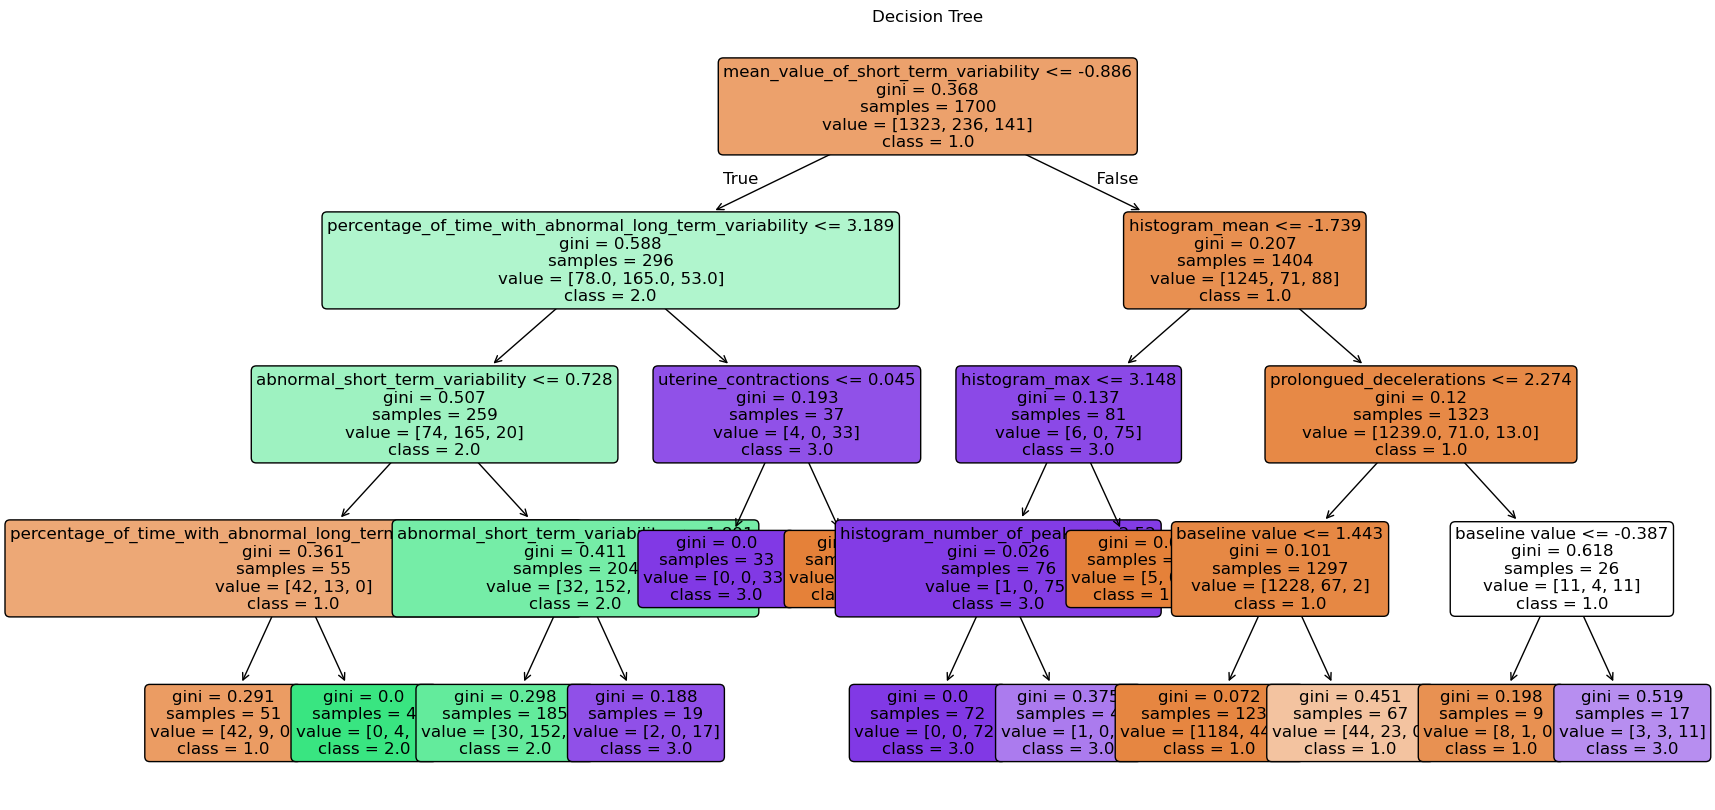

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  
plot_tree(
    clf,
    feature_names=X.columns,  
    class_names=[str(c) for c in clf.classes_],  
    filled=True,              
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree")
plt.show()